In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("weatherAUS.csv")

# Preprocessing: Convert categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'])

In [2]:
# Split data into features and target variable
X = data.drop(columns=['Date', 'RainTomorrow_Yes']) # Extract features
y = data['RainTomorrow_Yes'] # Extract target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into train and test sets

In [3]:
# Impute missing values
imputer = SimpleImputer(strategy='mean') # Instantiate imputer object with mean strategy
X_train_imputed = imputer.fit_transform(X_train) # Impute missing values in training set
X_test_imputed = imputer.transform(X_test) # Impute missing values in test set

In [4]:
# Scale the data
scaler = StandardScaler() # Instantiate scaler object
X_train_scaled = scaler.fit_transform(X_train_imputed) # Scale training data
X_test_scaled = scaler.transform(X_test_imputed) # Scale test data

In [5]:
# Train Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=1000)  # Instantiate Logistic Regression model with increased max_iter
log_reg.fit(X_train_scaled, y_train) # Train Logistic Regression model


LogisticRegression(max_iter=1000)

In [6]:
# Train Naive Bayes classifier
nb_classifier = GaussianNB() # Instantiate Naive Bayes classifier
nb_classifier.fit(X_train_scaled, y_train) # Train Naive Bayes classifier

GaussianNB()


Logistic Regression Metrics:
Confusion Matrix:
[[22444   228]
 [  131  6289]]


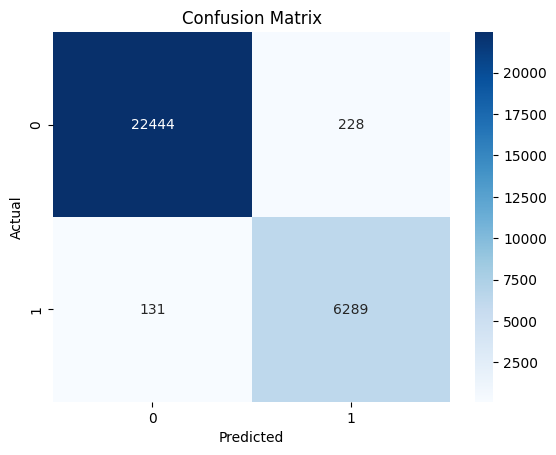

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     22672
        True       0.97      0.98      0.97      6420

    accuracy                           0.99     29092
   macro avg       0.98      0.98      0.98     29092
weighted avg       0.99      0.99      0.99     29092

ROC AUC Score: 0.9984914764420467


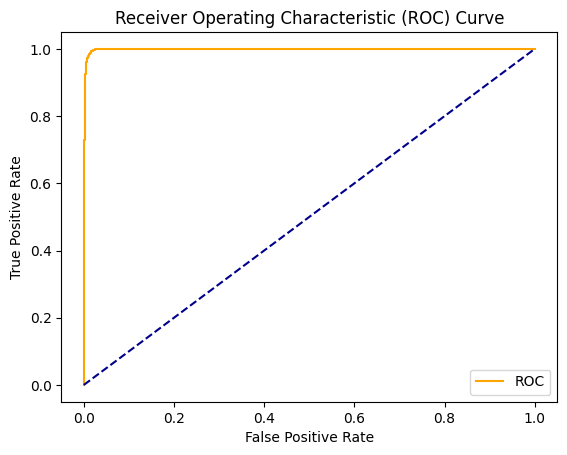

In [7]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred): # Define function to plot confusion matrix
    cm = confusion_matrix(y_true, y_pred) # Compute confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') # Plot confusion matrix as heatmap
    plt.xlabel('Predicted') # Set x-label
    plt.ylabel('Actual') # Set y-label
    plt.title('Confusion Matrix') # Set title
    plt.show() # Show plot

# Function to calculate and display classification metrics
def display_classification_metrics(model, X_test, y_test): # Define function to display classification metrics
    y_pred = model.predict(X_test) # Predict target variable
    print("Confusion Matrix:") # Print header for confusion matrix
    print(confusion_matrix(y_test, y_pred)) # Print confusion matrix
    plot_confusion_matrix(y_test, y_pred) # Plot confusion matrix
    print("Classification Report:") # Print header for classification report
    print(classification_report(y_test, y_pred)) # Print classification report
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1])) # Compute and print ROC AUC score

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test): # Define function to plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) # Compute ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC') # Plot ROC curve
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') # Plot diagonal line
    plt.xlabel('False Positive Rate') # Set x-label
    plt.ylabel('True Positive Rate') # Set y-label
    plt.title('Receiver Operating Characteristic (ROC) Curve') # Set title
    plt.legend() # Show legend
    plt.show() # Show plot

# Display classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:") # Print header for Logistic Regression metrics
display_classification_metrics(log_reg, X_test_scaled, y_test) # Display classification metrics for Logistic Regression
plot_roc_curve(log_reg, X_test_scaled, y_test) # Plot ROC curve for Logistic Regression




Naive Bayes Metrics:
Confusion Matrix:
[[22046   626]
 [  207  6213]]


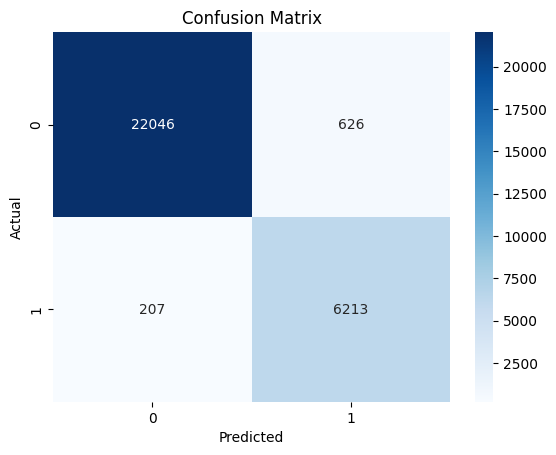

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98     22672
        True       0.91      0.97      0.94      6420

    accuracy                           0.97     29092
   macro avg       0.95      0.97      0.96     29092
weighted avg       0.97      0.97      0.97     29092

ROC AUC Score: 0.9893099197934735


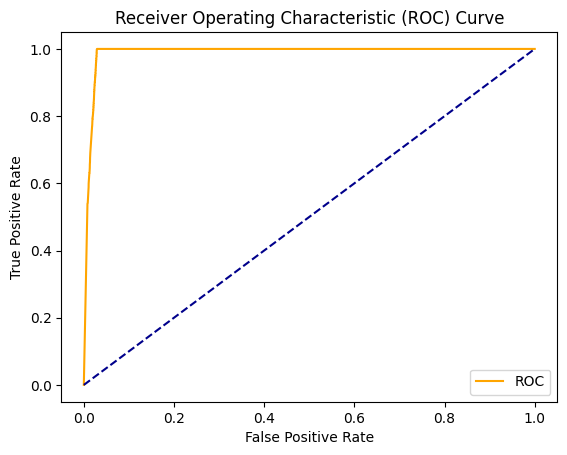

In [8]:

# Display classification metrics for Naive Bayes classifier
print("\n\nNaive Bayes Metrics:") # Print header for Naive Bayes metrics
display_classification_metrics(nb_classifier, X_test_scaled, y_test) # Display classification metrics for Naive Bayes
plot_roc_curve(nb_classifier, X_test_scaled, y_test) # Plot ROC curve for Naive Bayes

In [9]:
# Perform k-fold cross validation
cv_scores_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5) # Perform k-fold cross validation for Logistic Regression
cv_scores_nb = cross_val_score(nb_classifier, X_train_scaled, y_train, cv=5) # Perform k-fold cross validation for Naive Bayes

print("Cross Validation Scores (Logistic Regression):\t\t", cv_scores_log_reg) # Print cross validation scores for Logistic Regression
print("Mean Cross Validation Score (Logistic Regression):\t", np.mean(cv_scores_log_reg)) # Print mean cross validation score for Logistic Regression
print("Cross Validation Scores (Naive Bayes):\t\t\t", cv_scores_nb) # Print cross validation scores for Naive Bayes
print("Mean Cross Validation Score (Naive Bayes):\t\t", np.mean(cv_scores_nb)) # Print mean cross validation score for Naive Bayes

Cross Validation Scores (Logistic Regression):		 [0.98629372 0.98685228 0.98715305 0.98814076 0.98771108]
Mean Cross Validation Score (Logistic Regression):	 0.9872301783264199
Cross Validation Scores (Naive Bayes):			 [0.97031022 0.97189997 0.97181404 0.97284407 0.97417608]
Mean Cross Validation Score (Naive Bayes):		 0.9722088770314695


In [10]:
# Check for overfitting/underfitting and tune regularization hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # Define hyperparameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5) # Instantiate GridSearchCV with Logistic Regression model
grid_search.fit(X_train_scaled, y_train) # Perform grid search
print("Best Parameters:", grid_search.best_params_) # Print best hyperparameters

Best Parameters: {'C': 100}


Metrics for Best Logistic Regression Model:
Confusion Matrix:
[[22446   226]
 [  132  6288]]


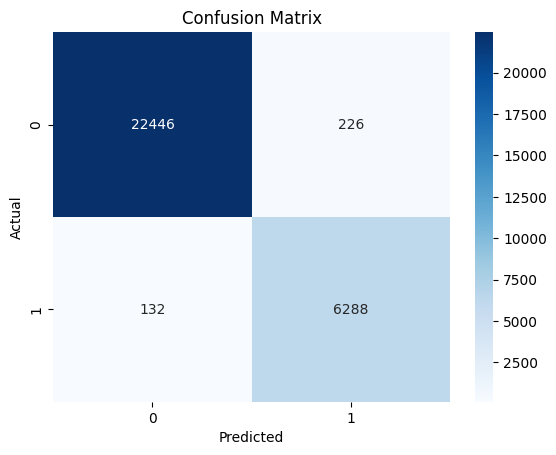

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     22672
        True       0.97      0.98      0.97      6420

    accuracy                           0.99     29092
   macro avg       0.98      0.98      0.98     29092
weighted avg       0.99      0.99      0.99     29092

ROC AUC Score: 0.9984915932369953


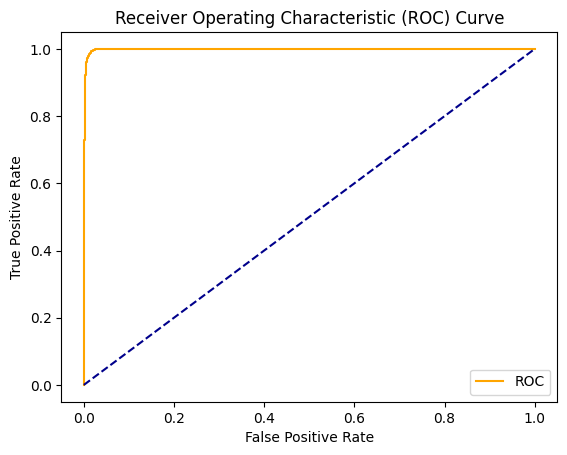

In [11]:
# Optimize hyperparameters using GridSearchCV
best_log_reg = grid_search.best_estimator_ # Get best Logistic Regression model
best_log_reg.fit(X_train_scaled, y_train) # Train best Logistic Regression model

# Display metrics for the best Logistic Regression model
print("Metrics for Best Logistic Regression Model:") # Print header for best Logistic Regression model metrics
display_classification_metrics(best_log_reg, X_test_scaled, y_test) # Display classification metrics for best Logistic Regression model
plot_roc_curve(best_log_reg, X_test_scaled, y_test) # Plot ROC curve for best Logistic Regression model